<a href="https://colab.research.google.com/github/ekrell/geoscience-attribution-benchmarks/blob/main/benchmarks/gen_rasters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

## Functions for generating random rasters

In [94]:
def filterBounds(coords_list, max_x, max_y, min_x=0, min_y=0):
  mins = (min_x, min_y)
  maxs = (max_x, max_y)
  a = coords_list
  return a[(a >= mins).all(axis=1) & (a <= maxs).all(axis=1)]


def grow(raster, mask, coords, threshold, decay, point_value, point_value_dist=0):
  if mask[coords[0], coords[1]] != 0:
    return
  mask[coords[0], coords[1]] = 1.0

  sample = np.random.rand()
  if sample <= threshold:
    raster[coords[0], coords[1]] = point_value + np.random.uniform(-1 * point_value_dist, point_value_dist)
  else:
    return

  neighbors = np.array([
      (coords[0] - 1, coords[1]),
      (coords[0] + 1, coords[1]),
      (coords[0], coords[1] - 1),
      (coords[0], coords[1] + 1),
  ])
  valid_neighbors = filterBounds(neighbors, raster.shape[1] - 1, raster.shape[0] - 1)
  for vn in valid_neighbors:
    grow(raster, mask, vn, threshold - decay, decay, point_value, point_value_dist)

## Example 1: Solid-Color Shapes

In [95]:
# Define raster
rows = 50
cols = 50

# Define placement seeds
seeds = [
    {"coords": (10, 10), "value": 0.2, "threshold": 0.9, "decay": 0.01, "value_dist": 0.2},
    {"coords": (20, 20), "value": 0.6, "threshold": 0.9, "decay": 0.01, "value_dist": 0.1},
    {"coords": (40, 20), "value": 0.8, "threshold": 0.9, "decay": 0.01, "value_dist": 0.3},
]

In [68]:
n_samples = 6
rasters = np.zeros((n_samples, rows, cols))
for i in range(n_samples):
  mask = rasters[i].copy()
  for seed in seeds:
    grow(rasters[i], mask, seed["coords"], seed["threshold"], seed["decay"], seed["value"])

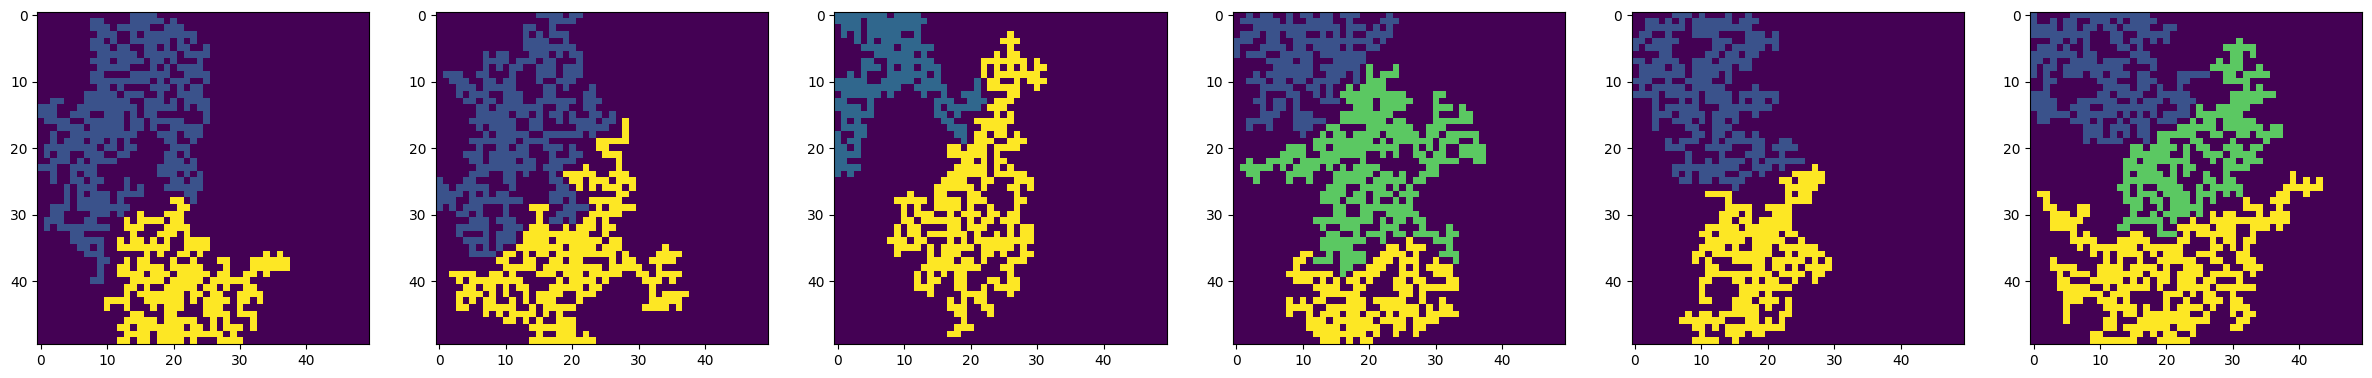

In [69]:
fig, axs = plt.subplots(1, n_samples, figsize=(n_samples * 5, 5))
for i in range(n_samples):
  axs[i].imshow(rasters[i])

## Example 2: Solid-Color Shapes + Dilation

In [62]:
dilations = [ndimage.grey_dilation(raster, size=(2, 2), structure=np.ones((2, 2))) for raster in rasters]

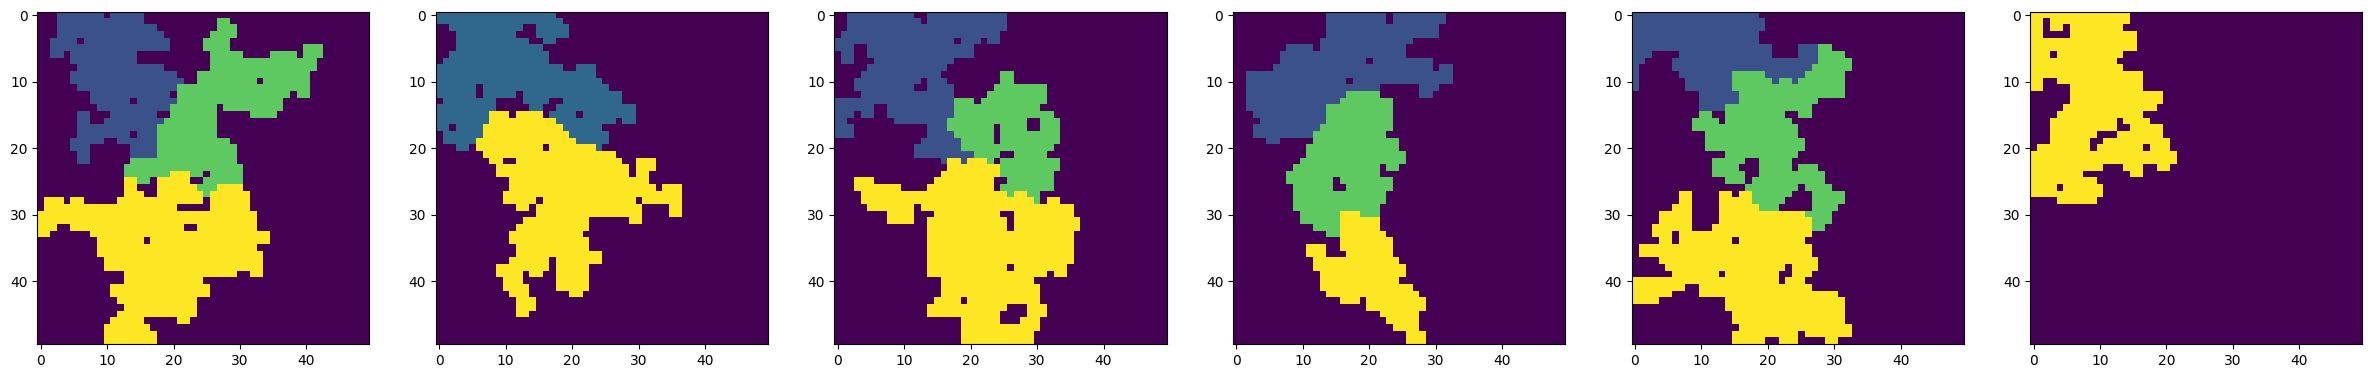

In [64]:
fig, axs = plt.subplots(1, n_samples, figsize=(n_samples * 5, 5))
for i in range(n_samples):
  axs[i].imshow(dilations[i])

## Example 3: Fuzzy-Color Shapes

In [96]:
rasters = np.zeros((n_samples, rows, cols))
for i in range(n_samples):
  mask = rasters[i].copy()
  for seed in seeds:
    grow(rasters[i], mask, seed["coords"], seed["threshold"], seed["decay"], seed["value"], seed["value_dist"])

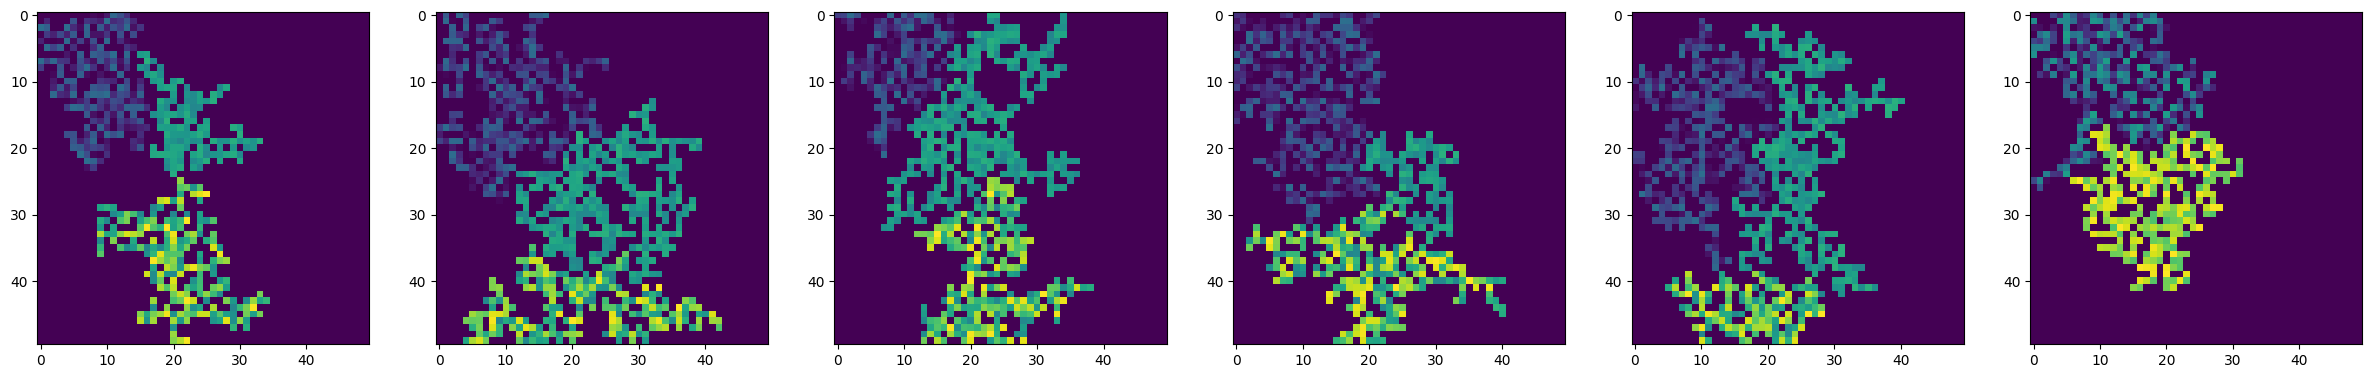

In [97]:
fig, axs = plt.subplots(1, n_samples, figsize=(n_samples * 5, 5))
for i in range(n_samples):
  axs[i].imshow(rasters[i])

## Example 4: Fuzzy-Color Shapes + Guassian

In [98]:
guassians = [ndimage.gaussian_filter(raster, sigma=0.75) for raster in rasters]

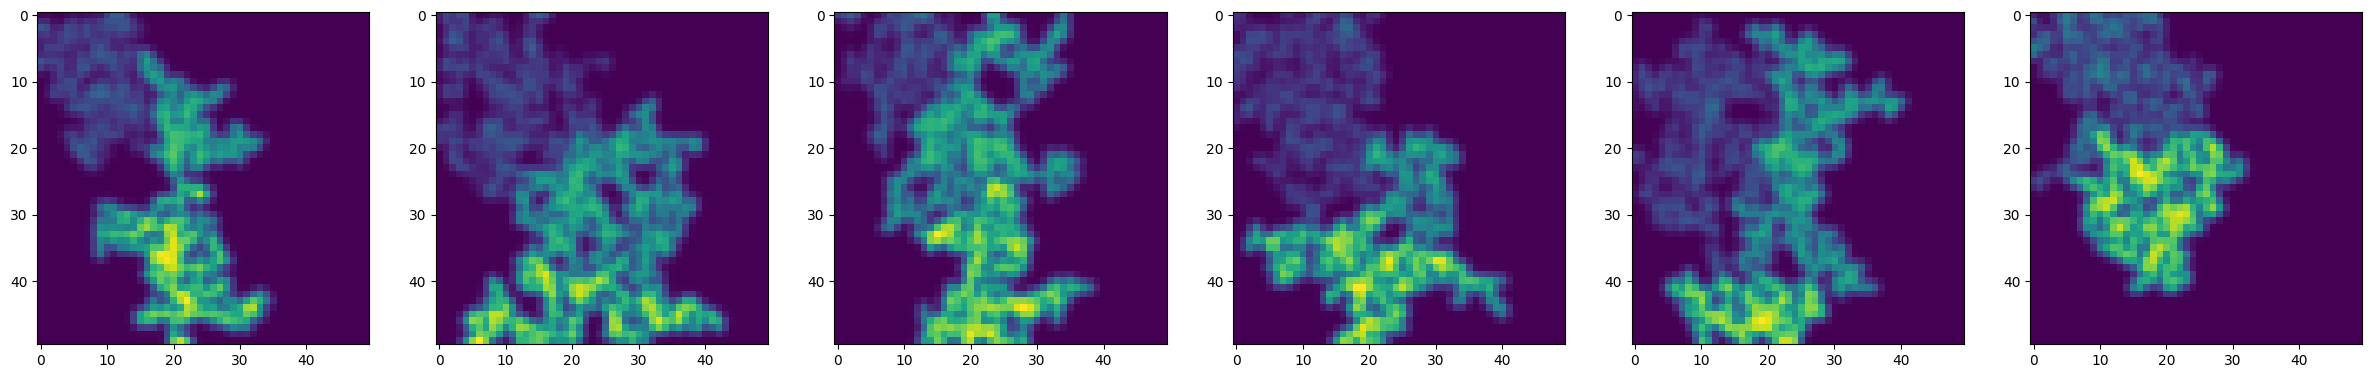

In [99]:
fig, axs = plt.subplots(1, n_samples, figsize=(n_samples * 5, 5))
for i in range(n_samples):
  axs[i].imshow(guassians[i])